# TASK 3 - CREDIT CARD FRAUD DETECTION

* Build a machine learning model to identify fraudulent credit card transactions.
* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
* Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
* Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.
* Dataset from kaggle - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [33]:
## Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [6]:
## Reading the csv file using pandas Dataframe:

df = pd.read_csv("creditcard.csv")
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
## Checking any Null values:

display(df.isnull().sum())      # No null values present

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
## Finding shape of Dataframe:

display(df.shape)

(284807, 31)

In [9]:
## Finding description of the data in the DataFrame:

display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
## Checking datatypes of each column:

display(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
## Finding counts of unique values in class column:

display(df.Class.unique())            #here 0 is genuine payment and 1 is fraudlent payment

display(df.Class.value_counts())      #here 0 is genuine payment and 1 is fraudlent payment

array([0, 1], dtype=int64)

0    284315
1       492
Name: Class, dtype: int64

# Performing EDA from above Dataframe:

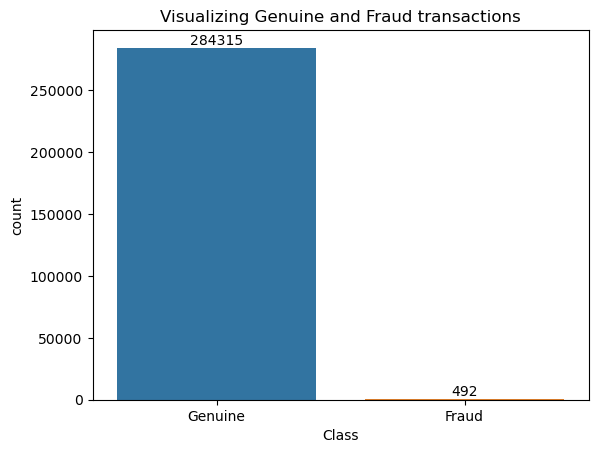

In [12]:
## Displaying Genuine VS Fraud transactions using countplot:

ax = sns.countplot(df, x = df["Class"].map({0:'Genuine',1:'Fraud'}))
for label in ax.containers:
    ax.bar_label(label)
ax.set_title("Visualizing Genuine and Fraud transactions")
plt.show()

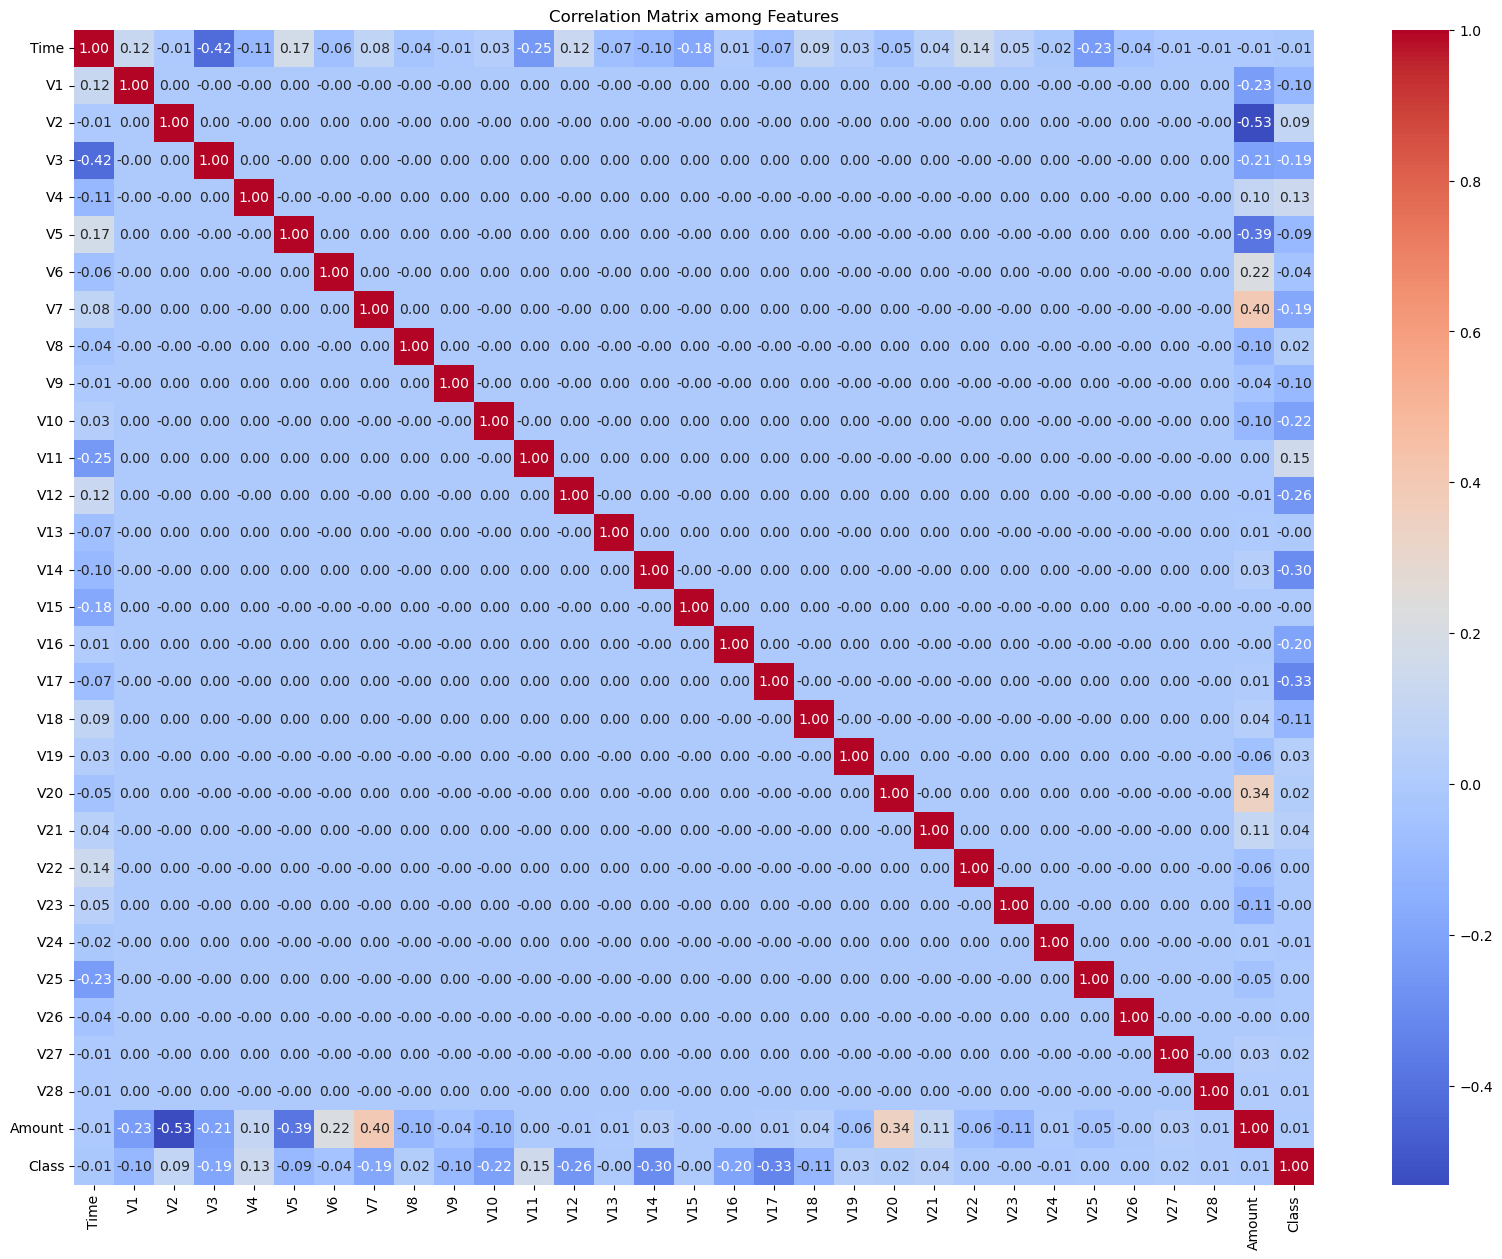

In [13]:
## Visualizing the correlation matrix among features:

correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix among Features")
plt.show()

# Preprocessing and Normalizing the Data:

In [40]:
## Separate features (X) and target variable (y):

X = df.drop('Class', axis=1)
y = df['Class']

## Split the data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
display(X_train)

array([[ 1.02255459,  0.99785119, -0.22962626, ...,  0.11248883,
        -0.14374055, -0.30788875],
       [ 0.47128275, -0.205221  , -0.37821992, ..., -0.92189789,
        -0.43984143, -0.1670264 ],
       [ 1.15338663,  0.03655821,  0.49556347, ...,  0.51372993,
         0.21235767, -0.30004345],
       ...,
       [-0.31581527, -0.07533181,  0.59962034, ..., -0.3013968 ,
        -0.59571596, -0.33162078],
       [-0.1444891 , -1.50615534,  1.42172842, ...,  1.23673372,
         1.01755287, -0.34315338],
       [-0.38770656,  0.62923844, -0.47354037, ...,  0.00310728,
         0.11623211,  0.0961834 ]])

In [16]:
display(X_test)

array([[-1.122118  , -8.43953559,  5.18252006, ..., -5.02350367,
        -3.16294175,  1.0815138 ],
       [-1.06408273,  0.1730534 , -1.65602032, ...,  0.10210496,
         0.30863538,  1.69317258],
       [-1.24890694,  0.71421679, -0.35634288, ...,  0.02847206,
         0.013272  , -0.22547388],
       ...,
       [ 1.00442384,  0.02018331, -0.06601034, ...,  0.89063984,
         1.0738269 , -0.31714621],
       [-0.75040591, -0.25325795,  0.59873588, ...,  0.10094377,
        -0.81883767, -0.33299371],
       [-0.96715373, -0.81263064,  0.59930001, ...,  0.31303049,
        -1.8421089 ,  3.2080607 ]])

# Building the model and predicting performances using Random forest classifier:

In [17]:
## Training the Random Forest Classifier:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
## Evaluating the Model's Performance:

y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
## Calculating accuarcy score:

accu_rf = accuracy_score(y_test,y_pred)
accu_rf

0.9995611109160493

# Building the model and predicting performances using Random forest classifier with oversampling of minority class:

In [22]:
## Create a pipeline for oversampling, and model training:

pipeline_over_rf = Pipeline([
    ('sampler', RandomOverSampler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

## Fit the pipeline on training data:

pipeline_over_rf.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomOverSampler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
## Make predictions using the pipeline:

y_pred_over_rf = pipeline_over_rf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_over_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_over_rf))


Confusion Matrix:
 [[56863     1]
 [   22    76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
## Calculating accuarcy score:

accu_over_rf = accuracy_score(y_test,y_pred_over_rf)
accu_over_rf

0.9995962220427653

# Building the model and predicting performances using Random forest classifier with undersampling of majority class:

In [25]:
## Create a pipeline for undersampling, and model training:

pipeline_under_rf = Pipeline([
    ('sampler', RandomUnderSampler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

## Fit the pipeline on training data:

pipeline_under_rf.fit(X_train, y_train)

Pipeline(steps=[('sampler', RandomUnderSampler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [26]:
## Make predictions using the pipeline:

y_pred_under_rf = pipeline_under_rf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_under_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_under_rf))


Confusion Matrix:
 [[55368  1496]
 [    9    89]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.91      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [27]:
## Calculating accuarcy score:

accu_under_rf = accuracy_score(y_test,y_pred_under_rf)
accu_under_rf

0.9735788771461676

# Display performance metrics of above three models:

In [31]:
print("1. Performance metrics of model using Random Forest Classifier:\n")
print("\nAccuarcy:\n", accu_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\n2. Performance metrics of model using Random Forest Classifier with Oversampling method:\n")
print("\nAccuarcy:\n", accu_over_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_over_rf))

print("\n3. Performance metrics of model using Random Forest Classifier with Undersampling method:\n")
print("\nAccuarcy:\n", accu_under_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_under_rf))

1. Performance metrics of model using Random Forest Classifier:


Accuarcy:
 0.9995611109160493

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


2. Performance metrics of model using Random Forest Classifier with Oversampling method:


Accuarcy:
 0.9995962220427653

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


3. Performance metrics of model using Random Forest Classifier with Undersamp

# Inference:

From the above metrics we can observe that random forest classifier model with oversampling of minority class has better performance(0.9995962220427653) when comparing with other two medthods.

# Testing Sample data using Random Forest Classifier with Oversampling method:

In [44]:
## Sample dataset1:

data1 = {
"Time": 37096,
"V1": -0.786425318,
"V2": 0.51238424,
"V3": 0.491182542,
"V4": -0.011542653,
"V5": -1.882473263,
"V6": 0.779978442,
"V7": 3.602000207,
"V8": -1.023585851,
"V9": -0.332199754,
"V10": 0.105442343,
"V11": 1.538921889,
"V12": 0.830551145,
"V13": 0.542485874,
"V14": -0.421494272,
"V15": -0.861114311,
"V16": -0.297459088,
"V17": -0.566636213,
"V18": -0.165525538,
"V19": 0.434086721,
"V20": -0.073987678,
"V21": -0.134076072,
"V22": 0.610039778,
"V23": -0.149521444,
"V24": 0.654807829,
"V25": -0.350771804,
"V26": 0.344448693,
"V27": 0.135544053,
"V28": -0.442233224,
"Amount": 550
}

test_df1=pd.DataFrame(data1,index=[0])
print("Sample dataset1 for testing:")
display(test_df1)

#We need to scale the test data before predicting the result since the model is trained with scaled dataset
test_df1 = scaler.transform(test_df1)


predict_test_df1=pipeline_over_rf.predict(test_df1)
print("Output for sample dataset1 is:")
display(predict_test_df1)

Sample dataset1 for testing:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,37096,-0.786425,0.512384,0.491183,-0.011543,-1.882473,0.779978,3.602,-1.023586,-0.3322,...,-0.073988,-0.134076,0.61004,-0.149521,0.654808,-0.350772,0.344449,0.135544,-0.442233,550


Output for sample dataset1 is:


array([0], dtype=int64)

In [45]:
## Sample dataset2:

data2 = {
"Time": 9064,
"V1": -3.499107537,
"V2": 0.258555161,
"V3": -4.489558073,
"V4": 4.853894351,
"V5": -6.974521545,
"V6": 3.628382091,
"V7": 5.431270921,
"V8": -1.946733711,
"V9": -0.775680093,
"V10": -1.987773188,
"V11": 4.690395666,
"V12": -6.998042432,
"V13": 1.454011986,
"V14": -3.738023334,
"V15": 0.317742063,
"V16": -2.013542681,
"V17": -5.136135103,
"V18": -1.183822117,
"V19": 1.663394014,
"V20": -3.042625757,
"V21": -1.052368256,
"V22": 0.204816874,
"V23": -2.11900744,
"V24": 0.170278608,
"V25": -0.393844118,
"V26": 0.296367194,
"V27": 1.985913218,
"V28": -0.900451638,
"Amount": 1809.68
}

test_df2=pd.DataFrame(data2,index=[0])
print("Sample dataset2 for testing:")
display(test_df2)

#We need to scale the test data before predicting the result since the model is trained with scaled dataset
test_df2 = scaler.transform(test_df2)

predict_test_df2=pipeline_over_rf.predict(test_df2)
print("Output for sample dataset2 is:")
predict_test_df2

Sample dataset2 for testing:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,9064,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.77568,...,-3.042626,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68


Output for sample dataset2 is:


array([1], dtype=int64)